# Кластеризация

Цель: найти группы (кластеры) схожих объектов в выборке. \
Это обучение без учителя.\
Заранее эти группы неизвестны - нет "правильных" ответов.\
Из-за этого есть сложности с оценкой качества. Нет строго способа оценки "качества" кластеризации.
Разные методы и даже разные "настройки" одного и того же метода порождают разные результаты кластеризации.

Основные методы кластерного анализа:
- К-средних
- Иерархический

## Метод К-средних
Итеративный (пошаговый) метод, который работает непосредственно с объетками.\
Необходимо заранее указать кол-во групп.\
Последовательность:
1. Дан набор объектов
2. Выбрать кол-во кластеров и случаным образом пометить соответсвующее кол-во точек - это будут центры кластеров (центроиды)
3. Для каждоый точки найти расстояние до центроида. Отнести точку к тому кластеру, к которому относится ближайший центроид.
4. После того, как все точки распределены рассчитать для каждого кластера найти новый центроид.
5. Повторить шаги 1-4 до момента стабилизации центроидов.


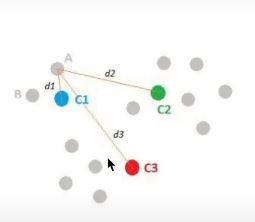

Алгоритм может давать плохие результаты, если:
- Число кластеров выбрано неверно
- Кластеры не выпуклые и близко расположены
- Дисперсии кластеров сильно отличаются
- Большая разница в размерах кластеров

Особенности работы:
- Алгоритм сходится к локальному оптимуму: результат не обязательно наилучший
- Инициализация центров крайне важна для качества решения (по умолчанию использовать k-means++)
- Крайне чувствителен к масштабу прогнозов

### Выбор количества кластеров
#### Метод локтя
Наиболее простой и распространенный способ. \
Оценивается степень разброса внутри каждого кластера.
Выбираем ту точку (локоть), где увеличение кол-ва классов не приводит к особому улучшению метрики. \
В sklearn - inertia.

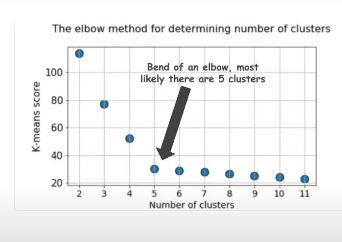

In [96]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style()

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [124]:
# Создаем тестовый датасет с использованием make_blobs
# Функция make_blobs() генерирует данные из изотропных гауссовских распределений
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=2)

<AxesSubplot:>

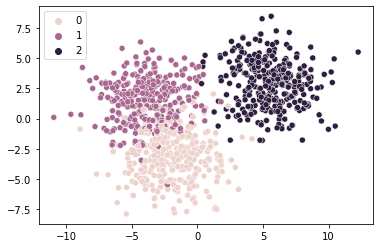

In [125]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [126]:
# Перед моделированием необходимо смаштабировать данные - провести стандартизацию.
# Для этого в библиотеке sklearn есть функция StandardScaler(). 
# Cоздаем объект функции StandardScaler(). Далее, используя fit_transform() преобразуем данные.
scaler = StandardScaler()
X = scaler.fit_transform(X)

<AxesSubplot:>

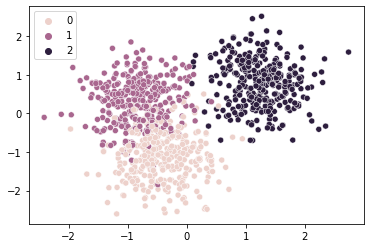

In [127]:
# Можно еще раз визуализировать и убедится что все ок
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [128]:
from sklearn.cluster import KMeans

Метод локтя для определения кол-ва групп

In [129]:
inertias = []
for i in range(2, 11):
    clst = KMeans(i)
    clst.fit(X)
    inertias.append(clst.inertia_)

<AxesSubplot:>

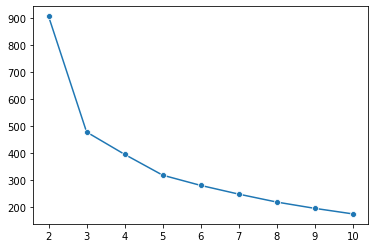

In [130]:
sns.lineplot(x=range(2, 11), y=inertias, marker='o')

Определим колчиство кластеров = 3

In [133]:
clst = KMeans(3)
# набор предсказанных ответов 
y_ = clst.fit_transform(X)

<AxesSubplot:>

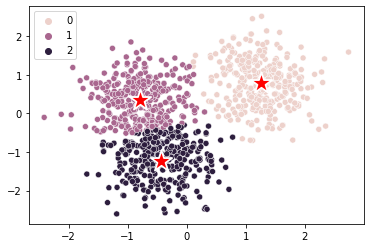

In [136]:
# Визуализируем полученный результат
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clst.labels_)

# центроиды
C = clst.cluster_centers_

sns.scatterplot(x=C[:, 0], y=C[:, 1], color='r', marker='*', s=500)

При появлении новых данных, чтобы их отнести к тому или иному сегменту, нужно измерить расстояния до центроидов. К какому центроиду ближе, к тому сегменту и относится.

## Иерархический алгоритм

В иерархических методах происходит последовательное объединение наиболее близких объектов в один кластер. По сути, изначально каждый объект считается кластером, которые затем сливаются друг с другом.

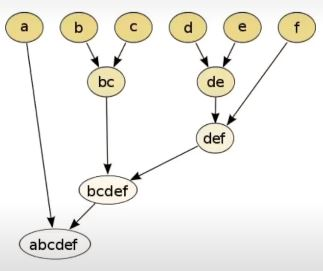

Для начала определяется попарные расстояния между точками (евклидово, манхеттенноское, чебышева и пр.) 

Методы определения расстояний между кластерами:
- ближнего соседа
- дальнего соседа
- групповое среднее
- расстояние между центрами
- **расстояние Уорда** (рекомендуется использовать по умолчанию)

Расстояние Уорда, упрощенно принцип выглядит так: на каждой итерации работы алгоритма для каждого варианта склейки кластера посчитать дисперсию и выбрать вариант с минимальным приростом дисперсии.

In [106]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

In [135]:
# pdist - попарные расстояния между точками
D = pdist(X)

In [141]:
# алгоритм иерархической кластеризации, принимает на вход расстояния между точками 
# и метод определения расстояния между кластерами
R = hierarchy.linkage(D, 'ward')

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [13.75, 13.75, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [73.75, 73.75, 110.0, 110.0],
  [31.875, 31.875, 91.875, 91.875],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [61.875, 61.875, 140.0, 140.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [210.0, 210.0, 233.75, 233.75],
  [182.5, 182.5, 221.875, 221.875],
  [165.0, 165.0, 202.1875, 202.1875],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [265.0, 265.0, 283.75, 283.75],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 

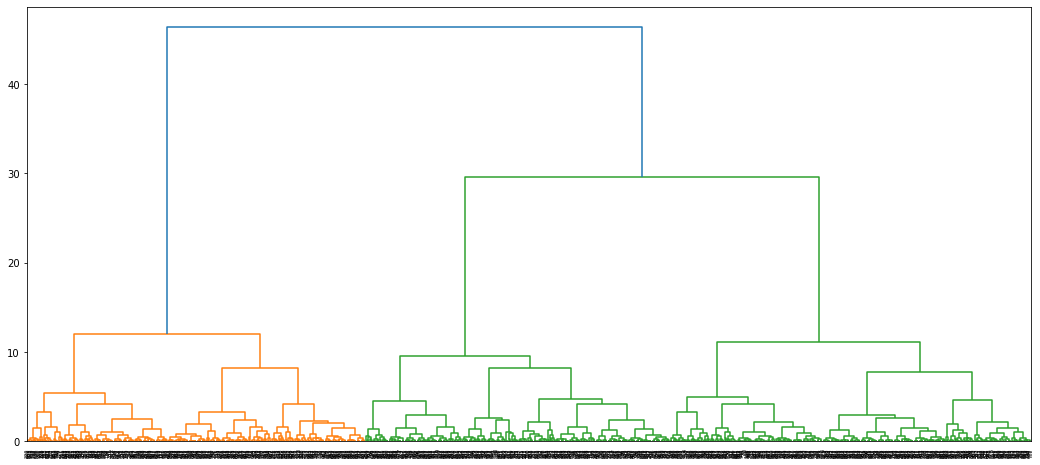

In [142]:
# удобно визуализировать с помощью дендограммы
plt.subplots(figsize=(18, 8))
hierarchy.dendrogram(R)

In [143]:
from sklearn.cluster import AgglomerativeClustering

In [144]:
clst = AgglomerativeClustering(3)
clst.fit(X)

AgglomerativeClustering(n_clusters=3)

In [145]:
clst.__dict__

{'n_clusters': 3,
 'distance_threshold': None,
 'memory': None,
 'connectivity': None,
 'compute_full_tree': 'auto',
 'linkage': 'ward',
 'affinity': 'euclidean',
 'compute_distances': False,
 'n_features_in_': 2,
 'children_': array([[ 641,  819],
        [ 256,  888],
        [ 398,  971],
        ...,
        [1990, 1993],
        [1994, 1995],
        [1996, 1997]], dtype=int64),
 'n_connected_components_': 1,
 'n_leaves_': 1000,
 'n_clusters_': 3,
 'labels_': array([1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2,
        0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0,
        2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0,
        0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 1,
        0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0,
        2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
        1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 0,
        1, 1, 

<AxesSubplot:>

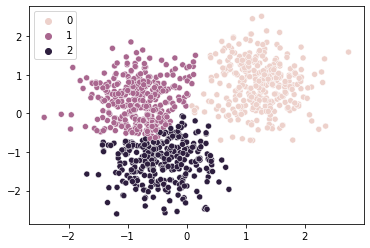

In [146]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clst.labels_)

# центроидов здесь нет, это значит добавить новые данные не получится, не к чему их "привязать"